In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

**Show DataFrame info.**

In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.shape

(10910, 26)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [4]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


**Standardization**

In [5]:
cols=[col_name.lower().replace(' ', '_') for col_name in data.columns]
cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [6]:
data= data.rename(columns={'unnamed:_0':'row'})
cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [7]:
data.columns=cols
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### **Describe DataFrame.**

Measures of central tendency - Mean, median, mode/
Measures of spread / dispersion - SD, var, range, quartiles, percentiles/
Meaures of frequency - Frequency

In [8]:
data['customer_lifetime_value'].describe()

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [9]:
print("Mean: ",data["customer_lifetime_value"].mean())
print("Median: ",data["customer_lifetime_value"].median())

Mean:  8018.241093723163
Median:  5771.1472345


<AxesSubplot:>

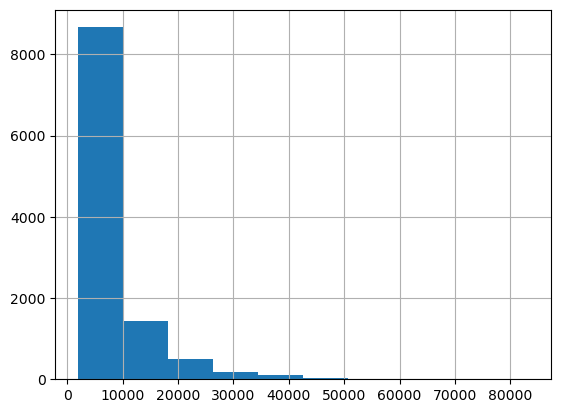

In [10]:
data['customer_lifetime_value'].hist()

In [11]:
data['income'].describe()

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: income, dtype: float64

In [12]:
print("Median: ",data["income"].median())

Median:  33813.5


In [13]:
data['number_of_open_complaints'].describe()

count    10277.000000
mean         0.384256
std          0.912457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: number_of_open_complaints, dtype: float64

In [14]:
print("Mode: ",data["state"].mode())

Mode:  0    California
Name: state, dtype: object


In [15]:
print("Mode: ",data["education"].mode())

Mode:  0    Bachelor
Name: education, dtype: object


In [16]:
summary = data.describe().T 
summary

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


### Show a plot of the total number of responses.

In [17]:
data["response"].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

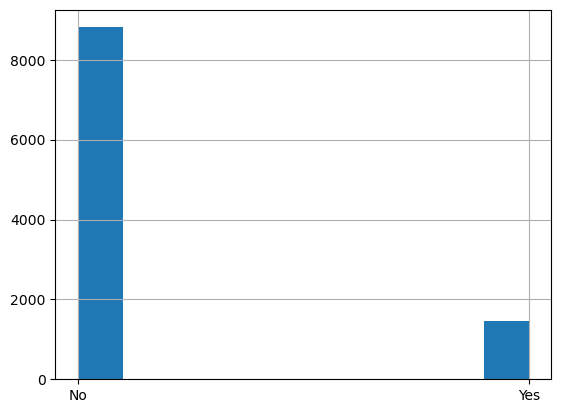

In [18]:
data['response'].hist()
plt.show()

### Show a plot of the response rate by the sales channel.

In [19]:
data['sales_channel']

0              Agent
1        Call Center
2        Call Center
3             Branch
4             Branch
            ...     
10905            Web
10906         Branch
10907            Web
10908         Branch
10909            Web
Name: sales_channel, Length: 10910, dtype: object

In [20]:
#data['response_yes'] = data['response'] =='yes' is True
data['response_yes'] = np.where(data['response']== 'Yes', 'yes', 'Nan')
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_yes
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Nan
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Nan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Nan
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,yes
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,Nan
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,Nan
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,Nan
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,Nan


In [21]:
data['response_no'] = np.where(data['response']== 'No', 'no', 'Nan')
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_yes,response_no
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Nan,no
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Nan,no
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Nan,no
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,yes,Nan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Nan,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,Nan,no
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,Nan,no
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,Nan,no
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,Nan,no


In [22]:
DSC= data[["sales_channel", "response_yes", "response_no"]]
DSC

,sales_channel,response_yes,response_no
0,Agent,Nan,no
1,Call Center,Nan,no
2,Call Center,Nan,no
3,Branch,yes,Nan
4,Branch,Nan,no
...,...,...,...
10905,Web,Nan,no
10906,Branch,Nan,no
10907,Web,Nan,no
10908,Branch,Nan,no


In [23]:
DSC["sales_channel"].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [24]:
Agent_yes=len(DSC[(DSC['sales_channel']=='Agent') & (DSC['response_yes']=='yes')])
Agent_yes

742

In [25]:
DSC['sales_channel'].value_counts()['Agent']

4121

In [26]:
Agent_RRate= Agent_yes/DSC['sales_channel'].value_counts()['Agent']
Agent_RRate.round(decimals = 2)

0.18

In [27]:
Call_Center_yes=len(DSC[(DSC['sales_channel']=='Call Center') & (DSC['response_yes']=='yes')])
Call_Center_yes

221

In [28]:
Call_Center_RRate= Call_Center_yes/DSC['sales_channel'].value_counts()['Call Center']
Call_Center_RRate.round(decimals = 2)

0.1

In [29]:
Branch_yes=len(DSC[(DSC['sales_channel']=='Branch') & (DSC['response_yes']=='yes')])
Branch_yes

326

In [30]:
Branch_RRate= Branch_yes/DSC['sales_channel'].value_counts()['Branch']
Branch_RRate.round(decimals = 2)

0.11

In [31]:
Web_yes=len(DSC[(DSC['sales_channel']=='Web') & (DSC['response_yes']=='yes')])
Web_yes

177

In [32]:
Web_RRate= Branch_yes/DSC['sales_channel'].value_counts()['Web']
Web_RRate.round(decimals = 2)

0.2

In [33]:
final_table= {'sales_channel':  ['Agent', 'Call Center', 'Branch', 'Web'],
        'response_rate': [Agent_RRate, Call_Center_RRate, Branch_RRate, Web_RRate]}
final_table= pd.DataFrame(final_table)
final_table

,sales_channel,response_rate
0,Agent,0.180053
1,Call Center,0.103223
2,Branch,0.107876
3,Web,0.200492


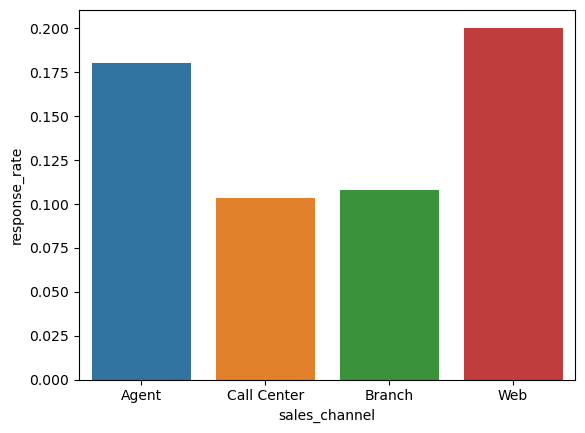

In [34]:
sns.barplot(x='sales_channel', y ="response_rate", data = final_table) 
plt.show()

### Show a plot of the response rate by the total claim amount.

In [35]:
pd.qcut(data['total_claim_amount'], q=4)

0        (271.083, 382.565]
1          (547.2, 2893.24]
2          (382.565, 547.2]
3          (382.565, 547.2]
4          (547.2, 2893.24]
                ...        
10905      (547.2, 2893.24]
10906    (271.083, 382.565]
10907    (271.083, 382.565]
10908      (547.2, 2893.24]
10909      (547.2, 2893.24]
Name: total_claim_amount, Length: 10910, dtype: category
Categories (4, interval[float64, right]): [(0.098, 271.083] < (271.083, 382.565] < (382.565, 547.2] < (547.2, 2893.24]]

In [36]:
bin_labels=['bin_1', 'bin_2', 'bin_3', 'bin_4']
data['total_claim_amount_bins'] = pd.qcut(data['total_claim_amount'], 4,labels=bin_labels)

data.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_yes,response_no,total_claim_amount_bins
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Nan,no,bin_2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Nan,no,bin_4
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Nan,no,bin_3
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,yes,Nan,bin_3
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Nan,no,bin_4


In [49]:
DOC= data[["total_claim_amount_bins", "response"]]
DOC

,total_claim_amount_bins,response
0,bin_2,No
1,bin_4,No
2,bin_3,No
3,bin_3,Yes
4,bin_4,No
...,...,...
10905,bin_4,No
10906,bin_2,No
10907,bin_2,No
10908,bin_4,No


In [50]:
DOC['response_yes'] = np.where(DOC['response']== 'Yes', 'yes', 'Nan')
DOC.head()

,total_claim_amount_bins,response,response_yes
0,bin_2,No,Nan
1,bin_4,No,Nan
2,bin_3,No,Nan
3,bin_3,Yes,yes
4,bin_4,No,Nan


In [52]:
DOC['response_no'] = np.where(DOC['response']== 'No', 'no', 'Nan')
DOC.head()

,total_claim_amount_bins,response,response_yes,response_no
0,bin_2,No,Nan,no
1,bin_4,No,Nan,no
2,bin_3,No,Nan,no
3,bin_3,Yes,yes,Nan
4,bin_4,No,Nan,no


In [53]:
DOC= DOC.drop(['response'], axis=1)
DOC

,total_claim_amount_bins,response_yes,response_no
0,bin_2,Nan,no
1,bin_4,Nan,no
2,bin_3,Nan,no
3,bin_3,yes,Nan
4,bin_4,Nan,no
...,...,...,...
10905,bin_4,Nan,no
10906,bin_2,Nan,no
10907,bin_2,Nan,no
10908,bin_4,Nan,no


In [55]:
bin1_yes=len(DOC[(DOC['total_claim_amount_bins']=='bin_1') & (DOC['response_yes']=='yes')])
bin1_yes

232

In [56]:
bin1_RRate= bin1_yes/DOC['total_claim_amount_bins'].value_counts()['bin_1']
bin1_RRate

0.08504398826979472

In [57]:
bin2_yes=len(DOC[(DOC['total_claim_amount_bins']=='bin_2') & (DOC['response_yes']=='yes')])
bin2_yes

413

In [58]:
bin2_RRate= bin1_yes/DOC['total_claim_amount_bins'].value_counts()['bin_2']
bin2_RRate

0.08507517418408507

In [59]:
bin3_yes=len(DOC[(DOC['total_claim_amount_bins']=='bin_3') & (DOC['response_yes']=='yes')])
bin3_yes

459

In [60]:
bin3_RRate= bin1_yes/DOC['total_claim_amount_bins'].value_counts()['bin_3']
bin3_RRate

0.08460977388767323

In [61]:
bin4_yes=len(DOC[(DOC['total_claim_amount_bins']=='bin_4') & (DOC['response_yes']=='yes')])
bin4_yes

362

In [62]:
bin4_RRate= bin1_yes/DOC['total_claim_amount_bins'].value_counts()['bin_4']
bin4_RRate

0.085514190932547

In [63]:
DOC_final= {'total_claim_amount_bins':  ['bin_1', 'bin_2', 'bin_3', 'bin_4'],
        'response_rate': [bin1_RRate, bin2_RRate, bin3_RRate, bin4_RRate]}
DOC_final= pd.DataFrame(DOC_final)
DOC_final

,total_claim_amount_bins,response_rate
0,bin_1,0.085044
1,bin_2,0.085075
2,bin_3,0.084610
3,bin_4,0.085514


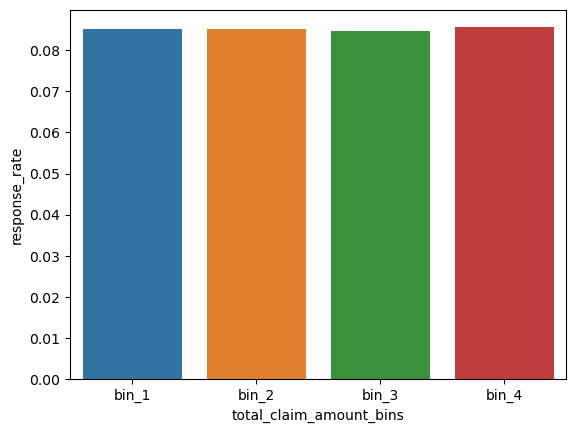

In [64]:
sns.barplot(x='total_claim_amount_bins', y ="response_rate", data = DOC_final) 
plt.show()

### Show a plot of the response rate by income.

In [66]:
income_bin_labels=['income_1', 'income_2', 'income_3']
data['income_bins'] = pd.qcut(data['income'], 3,labels=income_bin_labels)

data.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,response_yes,response_no,total_claim_amount_bins,income_bins
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Nan,no,bin_2,income_2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Nan,no,bin_4,income_1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Nan,no,bin_3,income_2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,yes,Nan,bin_3,income_2
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Nan,no,bin_4,income_2


In [67]:
DI= data[["income_bins", "response"]]
DI

,income_bins,response
0,income_2,No
1,income_1,No
2,income_2,No
3,income_2,Yes
4,income_2,No
...,...,...
10905,income_1,No
10906,income_3,No
10907,income_2,No
10908,income_3,No


In [68]:
DI['response_yes'] = np.where(DI['response']== 'Yes', 'yes', 'Nan')
DI.head()

,income_bins,response,response_yes
0,income_2,No,Nan
1,income_1,No,Nan
2,income_2,No,Nan
3,income_2,Yes,yes
4,income_2,No,Nan


In [69]:
DI['response_no'] = np.where(DI['response']== 'No', 'no', 'Nan')
DI.head()

,income_bins,response,response_yes,response_no
0,income_2,No,Nan,no
1,income_1,No,Nan,no
2,income_2,No,Nan,no
3,income_2,Yes,yes,Nan
4,income_2,No,Nan,no


In [70]:
DI= DI.drop(['response'], axis=1)
DI

,income_bins,response_yes,response_no
0,income_2,Nan,no
1,income_1,Nan,no
2,income_2,Nan,no
3,income_2,yes,Nan
4,income_2,Nan,no
...,...,...,...
10905,income_1,Nan,no
10906,income_3,Nan,no
10907,income_2,Nan,no
10908,income_3,Nan,no


In [71]:
income_1_yes=len(DI[(DI['income_bins']=='income_1') & (DI['response_yes']=='yes')])
income_1_yes

449

In [72]:
income_1_RRate= income_1_yes/DI['income_bins'].value_counts()['income_1']
income_1_RRate

0.1234194612424409

In [73]:
income_2_yes=len(DI[(DI['income_bins']=='income_2') & (DI['response_yes']=='yes')])
income_2_yes

531

In [74]:
income_2_RRate= income_2_yes/DI['income_bins'].value_counts()['income_2']
income_2_RRate

0.14607977991746904

In [75]:
income_3_yes=len(DI[(DI['income_bins']=='income_3') & (DI['response_yes']=='yes')])
income_3_yes

486

In [76]:
income_3_RRate= income_3_yes/DI['income_bins'].value_counts()['income_3']
income_3_RRate

0.1336266153423151

In [77]:
DI_final= {'income_bins':  ['income_1', 'income_2', 'income_3'],
        'response_rate': [income_1_RRate, income_2_RRate, income_3_RRate]}
DI_final= pd.DataFrame(DI_final)
DI_final

,income_bins,response_rate
0,income_1,0.123419
1,income_2,0.146080
2,income_3,0.133627


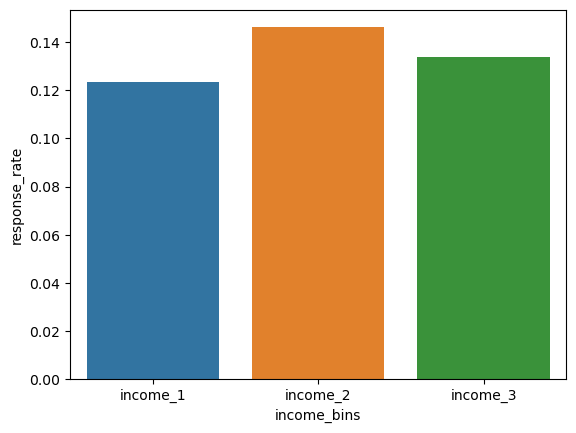

In [78]:
sns.barplot(x='income_bins', y ="response_rate", data = DI_final) 
plt.show()